In [30]:
# Importing all the required libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ppscore as pps
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Loading the dataset 

In [2]:
cars=pd.read_csv('cars.csv')

In [3]:
cars.head()

,MMV,Make,Model,Variant,Type,Fuel Type,Age,Transmission,Color,Kms,No of Owner,Heath score,price score,on road price,Current Price,Dep
0,HyundaiI10Sportz 1.2,Hyundai,I10,Sportz 1.2,Hatchback,Petrol,3,Manual,White,"12,000",1,8.5,8.8,537850,338352,37.1
1,HyundaiI20Magna (O) 1.2,Hyundai,I20,Magna (O) 1.2,Hatchback,Petrol,9,Manual,Beige,"68,000",1,5.0,7.3,613863,189200,69.2
2,HyundaiI20Sportz 1.2,Hyundai,I20,Sportz 1.2,Hatchback,Petrol,8,Manual,White,"31,143",1,6.2,4.6,678359,347568,48.8
3,HyundaiNeo Fluidic Elantra1.6SxAtCrdi,Hyundai,Neo Fluidic Elantra,1.6SxAtCrdi,Sedan,Diesel,2,Automatic,Silver,"6,000",1,8.5,7.9,2228480,1629250,26.9
4,HyundaiSantro XingXo,Hyundai,Santro Xing,Xo,Hatchback,Petrol,11,Manual,Golden,"1,00,000",2,4.3,9.9,453719,86240,81.0


In [4]:
# preparing the column in decending order according to predictive power score 

ppsscores = dict(zip(cars.columns,list(map(lambda x : pps.score(cars, x, "Dep")['ppscore'],cars.columns))))
sorted(ppsscores,key = ppsscores.get,reverse=True)

['Dep',
 'Age',
 'MMV',
 'on road price',
 'Model',
 'Variant',
 'Current Price',
 'price score',
 'Kms',
 'Type',
 'No of Owner',
 'Heath score',
 'Fuel Type',
 'Make',
 'Color',
 'Transmission']

<BarContainer object of 16 artists>

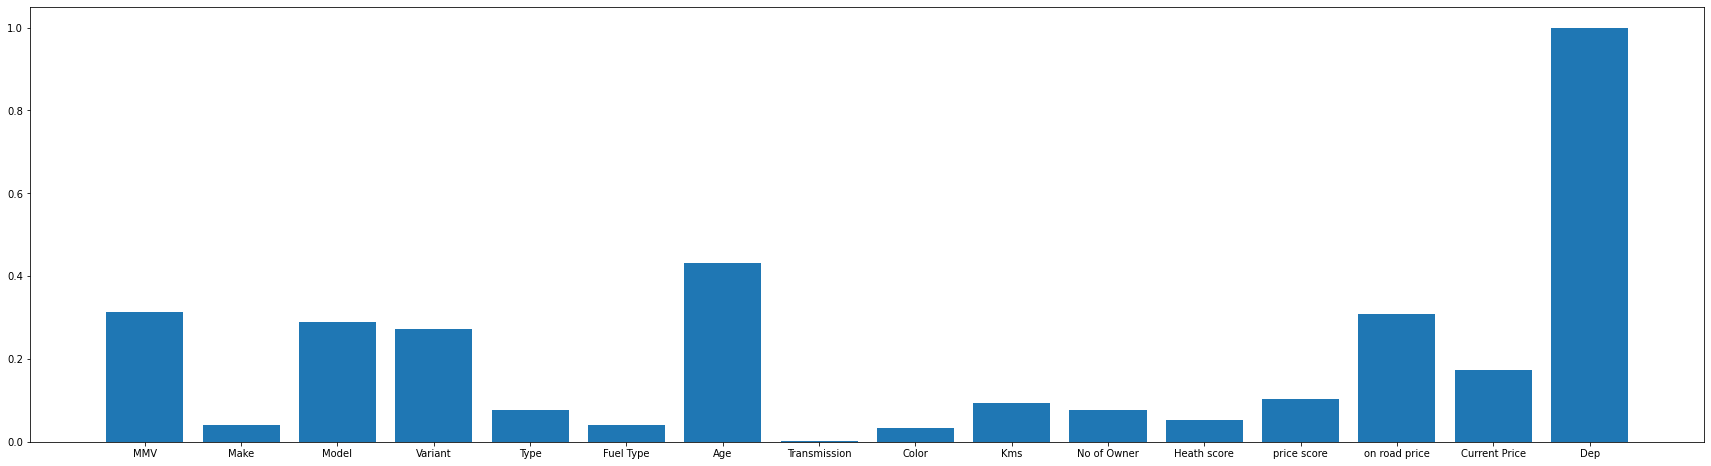

In [11]:
# ploting the pps scores of all the columns

plt.rcParams["figure.figsize"] = (30,8)
plt.bar(ppsscores.keys(),ppsscores.values())

In [13]:
# label encoding the features 

df=cars[['MMV', 'Make', 'Model', 'Variant', 'Type', 'Fuel Type',
       'Transmission', 'Color']].apply(LabelEncoder().fit_transform)

In [17]:
# data preparation

df = df.assign(Age=cars.Age,
               Kms=cars.Kms,
               No_of_owner=cars['No of Owner'],
               Health_score=cars['Heath score'],
               price_score=cars['price score'],
               On_road_price=cars['on road price'],
               Current_price=cars['Current Price'],
               Dep=cars.Dep)

In [70]:
df.head()

,MMV,Make,Model,Variant,Type,Fuel Type,Transmission,Color,Age,Kms,No_of_owner,Health_score,price_score,On_road_price,Current_price,Dep
0,191,1,35,345,1,3,2,31,3,12000.0,1,8.5,8.8,537850,338352,37.1
1,210,1,36,303,1,3,2,0,9,68000.0,1,5.0,7.3,613863,189200,69.2
2,216,1,36,345,1,3,2,31,8,31143.0,1,6.2,4.6,678359,347568,48.8
3,223,1,44,59,4,1,1,24,2,6000.0,1,8.5,7.9,2228480,1629250,26.9
4,233,1,51,440,1,3,2,10,11,100000.0,2,4.3,9.9,453719,86240,81.0


In [ ]:
df['Kms'] = df.Kms.str.replace(',', '').astype(float)

In [64]:
X=df.drop(['Dep'],axis=1)
Y=df.Dep

In [67]:
# splitting the train and test data

X_train, X_test, y_train, y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [69]:
# training the dataset

reg=RandomForestRegressor(n_estimators=100, random_state=0, n_jobs=-1)
reg.fit(X_train,y_train)

RandomForestRegressor(n_jobs=-1, random_state=0)

In [71]:
# predicting the data

y_pred = reg.predict(X_test)

In [72]:
# Evaluating the model accuracy

from sklearn import metrics
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 4.194247916629056


In [73]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error:  2.7949852813852805


In [81]:
print('Training Accuracy:', reg.score(X_train,y_train))

Training Accuracy: 0.9914507532980611


In [82]:
print('Training Accuracy:',reg.score(X_test,y_test))

Training Accuracy: 0.9410188927497962
